<h1 align=center>EXPLORATORY DATA ANALYSIS (EDA)</h1>

---

## Introduction
- In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

- You can say that EDA is statisticians way of story telling where you explore data, find patterns and tells insights. Often you have some questions in hand you try to validate those questions by performing EDA.

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:
- main features of data
- variables and relationships that hold between them
- identifying which variables are important for our problem

We shall look at various exploratory data analysis methods like:

1. Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample
1. Grouping data [Basic grouping with group by]
1. Correlation and causation.

## 1. Import Data

You can find the "Automobile Data Set" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

 Import libraries 

In [44]:
import pandas as pd
import numpy as np

 load data and store in dataframe df:

In [54]:
path='../2.1.Linear Regression/dataset/nyc-taxi3.csv'

df = pd.read_csv(path)
df.head(10)

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1.0,9.40,15,2,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,NaN,14.75,13,4,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,1.0,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,1.0,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,1.0,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30
5,1.0,3.07,9,1,1,None,False,0.000000,6.0,0.0,0.159459,16.30
6,1.0,0.92,23,4,1,None,False,0.000000,1.0,0.0,-2.999107,8.97
7,1.0,1.90,12,4,1,None,False,0.000000,1.0,0.0,4.384091,11.80
8,1.0,0.77,0,1,1,None,False,0.000000,1.0,0.0,-5.393750,7.30
9,NaN,2.35,2,6,1,None,False,0.000000,24.0,254.0,10.943655,14.16


### Objective

What are the main characteristics which have the most impact on the car price?

## 2. Analyzing Individual Feature Patterns using Visualization

 Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### How to choose the right visualization method ?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualisation method for that variable.


In [47]:
# list the data types for each column
df.dtypes

passengerCount          float64
tripDistance            float64
hour_of_day               int64
day_of_week               int64
month_num                 int64
normalizeHolidayName     object
isPaidTimeOff              bool
snowDepth               float64
precipTime              float64
precipDepth             float64
temperature             float64
totalAmount             float64
dtype: object

In [48]:
df.corr()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
passengerCount,1.000000,0.007859,0.001190,0.034503,-0.000274,-0.005290,0.002915,0.003535,0.001135,-0.000011,0.013083
tripDistance,0.007859,1.000000,-0.054169,0.024936,0.008597,0.013130,0.009923,-0.001689,-0.004524,0.020503,0.912461
hour_of_day,0.001190,-0.054169,1.000000,-0.086562,-0.002458,-0.041185,0.016471,0.007831,0.010947,-0.015054,-0.026531
day_of_week,0.034503,0.024936,-0.086562,1.000000,0.019255,-0.147402,-0.066260,-0.071852,-0.085533,0.016873,0.008425
month_num,-0.000274,0.008597,-0.002458,0.019255,1.000000,-0.115338,-0.301538,0.102491,-0.111110,0.832519,0.011155
isPaidTimeOff,-0.005290,0.013130,-0.041185,-0.147402,-0.115338,1.000000,-0.001425,0.068319,0.242770,-0.090847,-0.004805
snowDepth,0.002915,0.009923,0.016471,-0.066260,-0.301538,-0.001425,1.000000,0.023557,0.057489,-0.233195,0.011855
precipTime,0.003535,-0.001689,0.007831,-0.071852,0.102491,0.068319,0.023557,1.000000,0.172928,0.034417,0.003831
precipDepth,0.001135,-0.004524,0.010947,-0.085533,-0.111110,0.242770,0.057489,0.172928,1.000000,-0.135116,-0.009061
temperature,-0.000011,0.020503,-0.015054,0.016873,0.832519,-0.090847,-0.233195,0.034417,-0.135116,1.000000,0.022942


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.

## Continuous numerical variables: 

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines. 

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

 Let's see several examples of different linear relationships:

#### Positive linear relationship

Let's find the scatterplot of "engine-size" and "price" 

(0.0, 356.18399999999997)

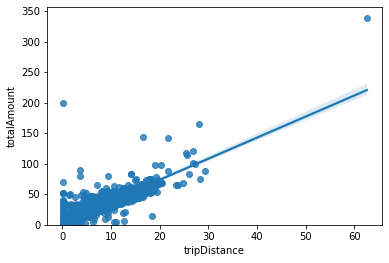

In [49]:
# Engine size as potential predictor variable of price
sns.regplot(x="tripDistance", y="totalAmount", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. E

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [50]:
df[["tripDistance", "totalAmount"]].corr()

,tripDistance,totalAmount
tripDistance,1.000000,0.912461
totalAmount,0.912461,1.000000


### Negative linear relationship

Highway mpg is a potential predictor variable of price 

<AxesSubplot:xlabel='precipDepth', ylabel='totalAmount'>

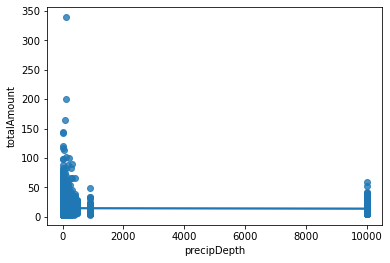

In [52]:
sns.regplot(x="precipDepth", y="totalAmount", data=df)

As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables. Highway mpg could potentially be a predictor of price.


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704

In [53]:
df[['precipDepth', 'totalAmount']].corr()

,precipDepth,totalAmount
precipDepth,1.000000,-0.009061
totalAmount,-0.009061,1.000000


### Weak Linear Relationship

Let's see if "Peak-rpm" as a predictor variable of "price".

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

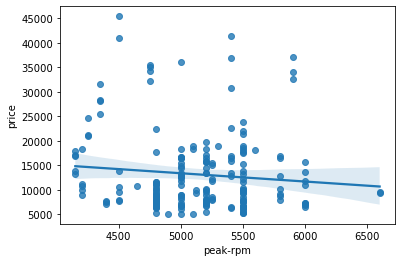

In [10]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.


 we can examine the correlation between 'peak-rpm'  and 'price'and see it's approximately  -0.101616 

In [11]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".

<AxesSubplot:xlabel='body-style', ylabel='price'>

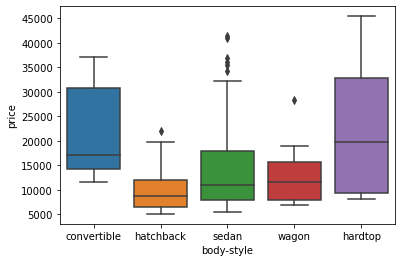

In [12]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price" :

<AxesSubplot:xlabel='engine-location', ylabel='price'>

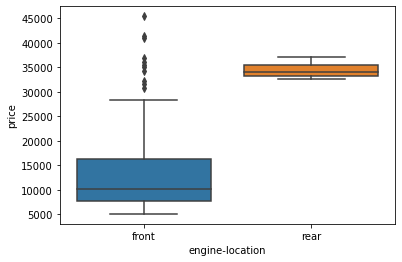

In [13]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price. 

 Let's examine "drive-wheels" and "price".

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

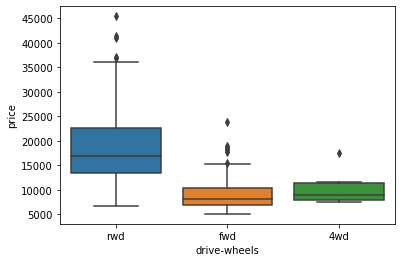

In [14]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

## 3. Descriptive Statistical Analysis

Let's first take a look at the variables by utilising a description method.

The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:
- the count of that variable
- the mean
- the standard deviation (std) 
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value



 We can apply the method "describe" as follows:

In [15]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [16]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column   'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket  "df['drive-wheels']" not two brackets "df[['drive-wheels']]".


In [17]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe as follows :

In [18]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


 Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.

In [19]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


 Now let's rename the index to 'drive-wheels':

In [20]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [21]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## 4. Basic of Grouping

 The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

 For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [22]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

 we can select the columns 'drive-wheels','body-style' and 'price' , then assign it to the variable "df_group_one".

In [23]:
df_group_one=df[['drive-wheels','body-style','price']]

we can then calculate the average price for each of the different categories of data.

In [24]:
# grouping results

df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'


In [25]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [26]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [27]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

If you didn't import "pyplot" let's do it again. 

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

#### Variables: Drive Wheels and Body Style vs Price

 Let's use a heat map to visualize the relationship between Body Style vs Price 

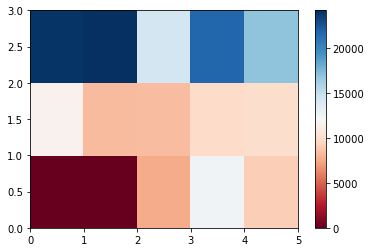

In [29]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style', 
The default labels convey no useful information to us. Let's change that:

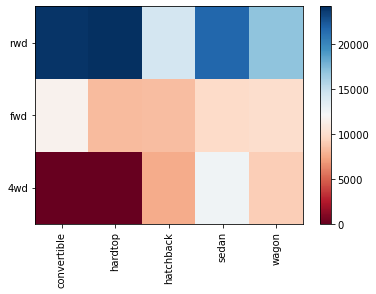

In [30]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python Visualizations course.

 The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?". 

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

## 5. Correlation and Causation

 **Correlation**: a measure of the extent of interdependence between variables.

## Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1**: total positive linear correlation,
- **0**: no linear correlation, the two variables most likely do not affect each other
- **-1**: total negative linear correlation.


 Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson correlation of the of the 'int64' or 'float64'  variables. 

In [31]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


 sometimes we would like to know the significant of the correlation estimate. 

**P-value**: 
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. 

By convention, when the 
- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- the p-value is < 0.05; there is moderate evidence that the correlation is significant,
- the p-value is < 0.1; there is weak evidence that the correlation is significant, and
- the p-value is > 0.1; there is no evidence that the correlation is significant.

 We can obtain this information using  "stats" module in the "scipy"  library.

In [32]:
from scipy import stats

### Wheel-base vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [33]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


##### Conclusion: 
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### Horsepower vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [34]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P = 6.369057428259557e-48


##### Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

### Length vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [35]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466158986e-30


##### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Width vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [36]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [37]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53


##### Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

### Engine-size vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [38]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


##### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### Bore vs Price

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [39]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


##### Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

### City-mpg vs Price

In [40]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29


##### Conclusion:
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

### Highway-mpg vs Price

In [41]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144477352e-31


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

## Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

In [42]:
df_new = df['curb-weight','','']

<Make One Hot Encoding here on Drive Wheels>

Test and Train Split

Fit Into a Linear Regression Model

On Test Data : Calculate RMSE 

SyntaxError: invalid syntax (Temp/ipykernel_49896/561343426.py, line 3)

In [43]:
df_new = df[['length','width','drive-wheels','price']]
drive_wheels_dummies = pd.get_dummies(df_new['drive-wheels'],
prefix='drive-wheels')drive_wheels_dummies.drop(drive_wheels_dummies.columns[0], 
 axis=1, inplace=True)drive_wheels_dummies.head()df_new1 = pd.concat([df_new, drive_wheels_dummies], axis=1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
   X = df_new1[feature_cols]
   y = df_new1.price
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=348)
   linreg = LinearRegression()
   linreg.fit(X_train, y_train)
   y_pred = linreg.predict(X_test)
   return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
   print(train_test_rmse(['length', 'width', 'drive-wheels_fwd', 'drive-wheels_rwd']))



SyntaxError: invalid syntax (Temp/ipykernel_49896/103260510.py, line 1)